# Feedforward Neural Network on MNIST Grayscale
### By Tomas Ward
Building a simple feedforward neural network (FNN) to classify digits from the grayscale MNIST dataset.


In [5]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import seaborn as sns

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


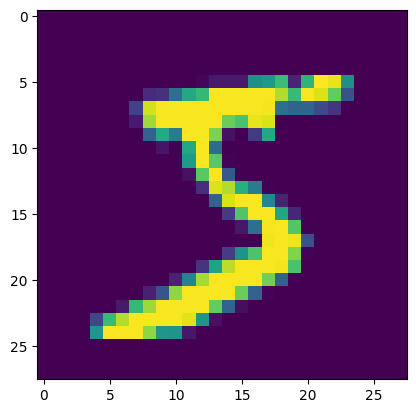

In [6]:
# Load data
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()
plt.imshow(mnist_x_train[0])

In [17]:
# Data Processing
# Normalize the images to [0, 1] range
mnist_x_train = mnist_x_train.astype('float32') / 255.0
mnist_x_test = mnist_x_test.astype('float32') / 255.0

# Convert labels to categorical format
mnist_y_train = to_categorical(mnist_y_train, num_classes=10)
mnist_y_test = to_categorical(mnist_y_test, num_classes=10)

In [18]:
# Constants
activation_dense = "relu"
optimizer = Adam(learning_rate=0.003)

In [19]:
# Create the model architecture
fnn_model = Sequential()

# Flatten the input images from Matrix to Vector form, so they can be understood by a Dense Layer.
fnn_model.add(Flatten(input_shape=(28, 28)))

# Hidden layers with ReLU activation function for non-linearity 
fnn_model.add(Dense(100,activation_dense))
fnn_model.add(Dropout(rate=0.2)) # To prevent overfitting
fnn_model.add(Dense(100,activation_dense))
fnn_model.add(Dense(50,activation_dense))

# Output Layer with 10 neurons to match the 0-9 digit classification. 
# Softmax used to get a probability distribution over the classification results.
fnn_model.add(Dense(10,activation='softmax'))

# Build and compile the model
fnn_model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
fnn_model.summary()             

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,160 (367.81 KB)

 Trainable params: 94,160 (367.81 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Plot Losses callback
import matplotlib.pyplot as plt
from IPython.display import clear_output
import keras


class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get("loss"))
        self.val_losses.append(logs.get("val_loss"))
        self.i += 1

        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.legend()
        plt.show()


plot_losses = PlotLosses()

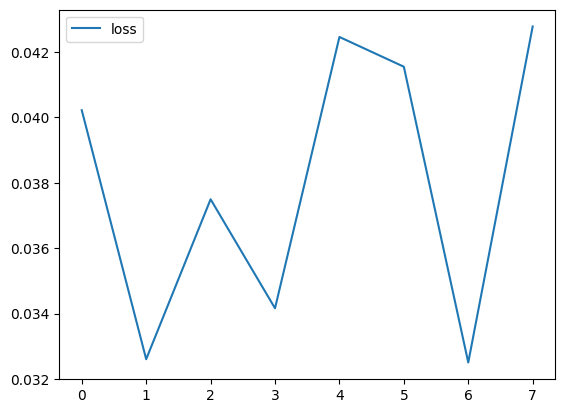

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - accuracy: 0.9902 - loss: 0.0422 - val_accuracy: 0.9773 - val_loss: 0.1426


In [24]:
from tensorflow.keras.callbacks import EarlyStopping

# Fit the model, plotting the loss in real time
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = fnn_model.fit(np.array(mnist_x_train), np.array(mnist_y_train), epochs=100,validation_split = 0.2, callbacks=[plot_losses, early_stopping])

In [25]:
# Evaluate the model with the test set
pred_y=fnn_model.predict(np.array(mnist_x_test))
pred_y=np.round(pred_y).astype(int).reshape(1,-1)[0]

# Compute the confusion matrix to monitor model performance
m=confusion_matrix(pred_y,mnist_y_test)
sns.heatmap(m, annot=True) # TODO: Change colors and add titles to all graphs

# TODO: Get accuracy and loss scores for test set

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step


ValueError: Found input variables with inconsistent numbers of samples: [100000, 10000]

## Random image reader
This codeblock picks a random image from the MNIST Grayscale test set and runs it through the model

In [ ]:
# TODO